In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_excel('pluscard.xlsx')

df

,ID,renda,tempo,classe,cartões,idade,sexo,propria,superior,UF,fatura
0,C237,2520,4,Prata,3,59,F,sim,nao,SP,203
1,C312,9070,6,Prata,4,60,M,sim,nao,RJ,203
2,C50,6890,5,Prata,3,50,M,sim,nao,MG,208
3,C132,4890,5,Prata,3,54,F,sim,sim,SP,210
4,C330,6930,6,Prata,2,85,F,sim,sim,SP,212
...,...,...,...,...,...,...,...,...,...,...,...
263,C91,16710,15,Ouro,5,46,M,sim,sim,MG,509
264,C332,14760,13,Ouro,3,52,F,nao,nao,RJ,510
265,C262,18090,16,Ouro,4,41,F,sim,sim,RJ,521
266,C77,22170,18,Ouro,2,41,F,sim,sim,MG,525


### **1. Os Dados:**

No conjunto de dados acima temos informações sobre o valor monetário médio das faturas de 268 clientes, e o perfil desses clientes.

Temos como objetivo a construção de uma regressão linear múltipla para prever o valor médio das faturas desses clientes, com base em seu perfil. Essas previsões podem ser aplicadas no mundo real de diversas maneiras, inclusive para melhor ajustar os limites de crédito de clientes de um banco.

As variáveis que temos acesso são:

- ID: identificação do cliente
- renda: Renda familiar mensal do cliente
- tempo: tempo de posse do cartão
- classe: Classificação de relacionamento do cliente
- cartoes: Quantos cartões possui
- idade: Idade do cliente
- sexo: Sexo do cliente
- propria: Possui casa própria?
- superior: Tem curso superior?
- UF: Estado de residência
- fatura: Média do valor das faturas nos últimos 12 meses

In [99]:
# todos os dados completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        268 non-null    object
 1   renda     268 non-null    int64 
 2   tempo     268 non-null    int64 
 3   classe    268 non-null    object
 4   cartões   268 non-null    int64 
 5   idade     268 non-null    int64 
 6   sexo      268 non-null    object
 7   propria   268 non-null    object
 8   superior  268 non-null    object
 9   UF        268 non-null    object
 10  fatura    268 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 23.2+ KB


In [100]:
df.index = df['ID']
df.drop(['ID'], axis=1, inplace=True)

In [101]:
df

,renda,tempo,classe,cartões,idade,sexo,propria,superior,UF,fatura
ID,,,,,,,,,,
C237,2520,4,Prata,3,59,F,sim,nao,SP,203
C312,9070,6,Prata,4,60,M,sim,nao,RJ,203
C50,6890,5,Prata,3,50,M,sim,nao,MG,208
C132,4890,5,Prata,3,54,F,sim,sim,SP,210
C330,6930,6,Prata,2,85,F,sim,sim,SP,212
...,...,...,...,...,...,...,...,...,...,...
C91,16710,15,Ouro,5,46,M,sim,sim,MG,509
C332,14760,13,Ouro,3,52,F,nao,nao,RJ,510
C262,18090,16,Ouro,4,41,F,sim,sim,RJ,521


In [102]:
df.describe()

,renda,tempo,cartões,idade,fatura
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,6125.932836,7.335821,3.104478,55.246269,352.757463
std,4660.274247,2.796317,1.015008,17.152734,77.408717
min,1230.000000,2.000000,2.000000,23.000000,203.000000
25%,2770.000000,5.000000,2.000000,41.750000,295.000000
50%,4625.000000,7.000000,3.000000,55.000000,357.000000
75%,7852.500000,9.000000,4.000000,68.250000,410.000000
max,22170.000000,19.000000,5.000000,98.000000,547.000000


In [103]:
# bronze é uma minoria pequena dos clientes
df['classe'].value_counts()

classe
Prata     144
Ouro      118
Bronze      6
Name: count, dtype: int64

In [104]:
df['cartões'].value_counts()

cartões
2    95
3    80
4    63
5    30
Name: count, dtype: int64

In [105]:
df['propria'].value_counts()

propria
sim    235
nao     33
Name: count, dtype: int64

In [106]:
df['superior'].value_counts()

superior
sim    167
nao    101
Name: count, dtype: int64

In [107]:
df['UF'].value_counts()

UF
SP    139
MG     67
RJ     62
Name: count, dtype: int64

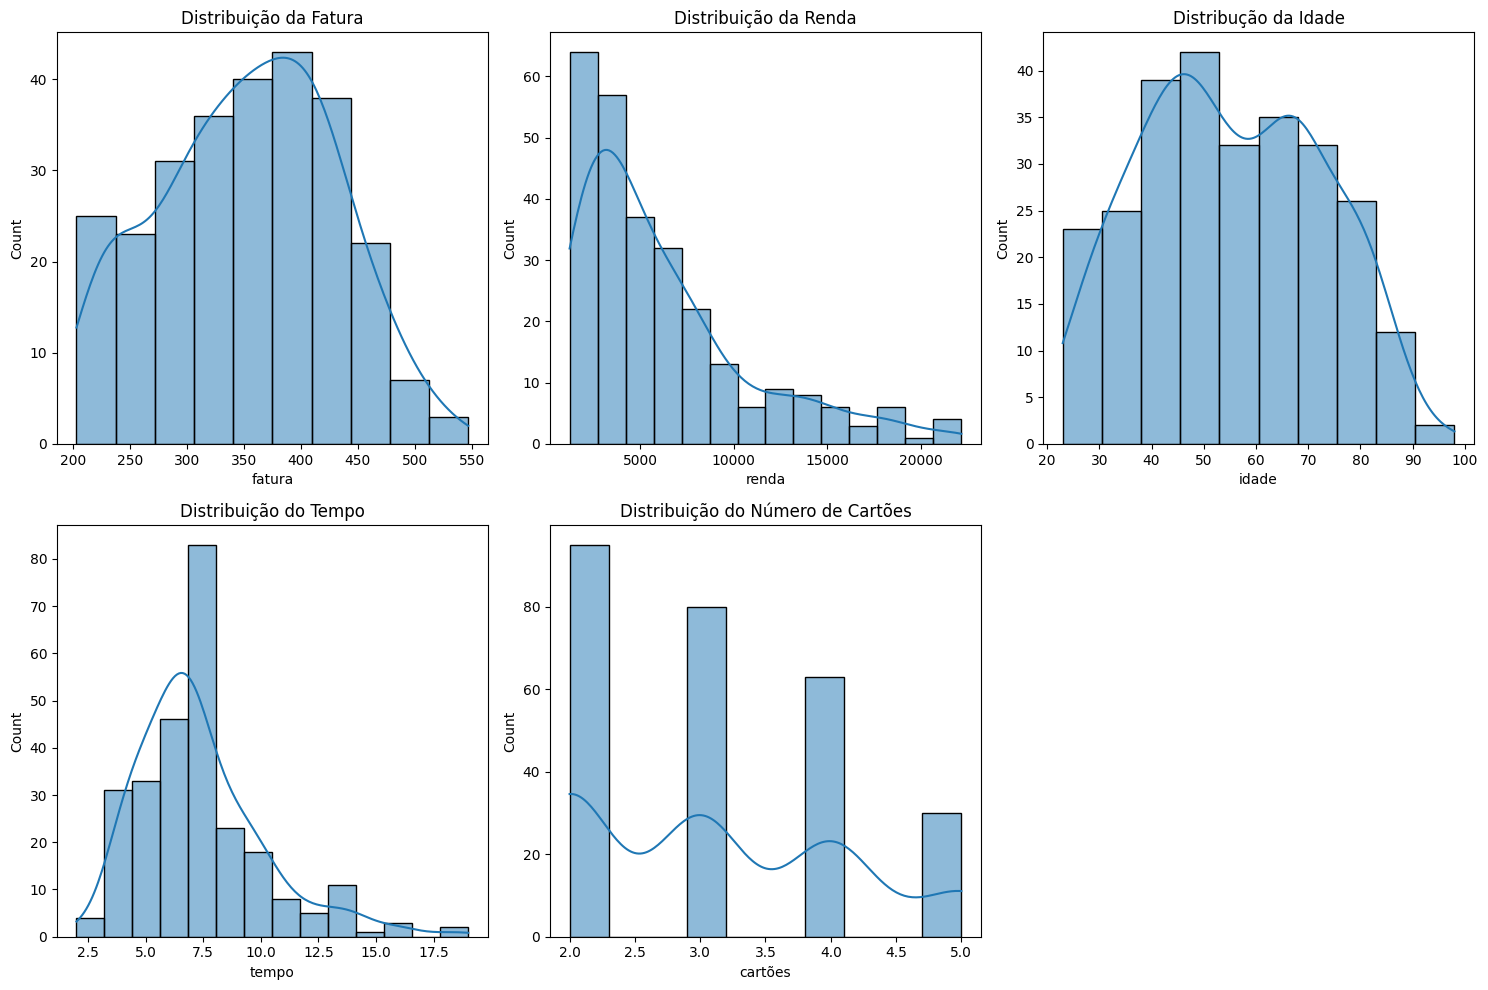

In [108]:
# Criando distribuições para variáveis numéricas
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['fatura'], kde=True)
plt.title('Distribuição da Fatura')

plt.subplot(2, 3, 2)
sns.histplot(df['renda'], kde=True)
plt.title('Distribuição da Renda')

plt.subplot(2, 3, 3)
sns.histplot(df['idade'], kde=True)
plt.title('Distribução da Idade')

plt.subplot(2, 3, 4)
sns.histplot(df['tempo'], kde=True)
plt.title('Distribuição do Tempo')

plt.subplot(2, 3, 5)
sns.histplot(df['cartões'], kde=True)
plt.title('Distribuição do Número de Cartões')

plt.tight_layout()
plt.show()

In [109]:
df = pd.get_dummies(df)

df

,renda,tempo,cartões,idade,fatura,classe_Bronze,classe_Ouro,classe_Prata,sexo_F,sexo_M,propria_nao,propria_sim,superior_nao,superior_sim,UF_MG,UF_RJ,UF_SP
ID,,,,,,,,,,,,,,,,,
C237,2520,4,3,59,203,False,False,True,True,False,False,True,True,False,False,False,True
C312,9070,6,4,60,203,False,False,True,False,True,False,True,True,False,False,True,False
C50,6890,5,3,50,208,False,False,True,False,True,False,True,True,False,True,False,False
C132,4890,5,3,54,210,False,False,True,True,False,False,True,False,True,False,False,True
C330,6930,6,2,85,212,False,False,True,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C91,16710,15,5,46,509,False,True,False,False,True,False,True,False,True,True,False,False
C332,14760,13,3,52,510,False,True,False,True,False,True,False,True,False,False,True,False
C262,18090,16,4,41,521,False,True,False,True,False,False,True,False,True,False,True,False


In [110]:
df.drop(['classe_Bronze', 'propria_nao', 'superior_nao', 'sexo_M'], axis=1, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, C237 to C126
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   renda         268 non-null    int64
 1   tempo         268 non-null    int64
 2   cartões       268 non-null    int64
 3   idade         268 non-null    int64
 4   fatura        268 non-null    int64
 5   classe_Ouro   268 non-null    bool 
 6   classe_Prata  268 non-null    bool 
 7   sexo_F        268 non-null    bool 
 8   propria_sim   268 non-null    bool 
 9   superior_sim  268 non-null    bool 
 10  UF_MG         268 non-null    bool 
 11  UF_RJ         268 non-null    bool 
 12  UF_SP         268 non-null    bool 
dtypes: bool(8), int64(5)
memory usage: 22.8+ KB


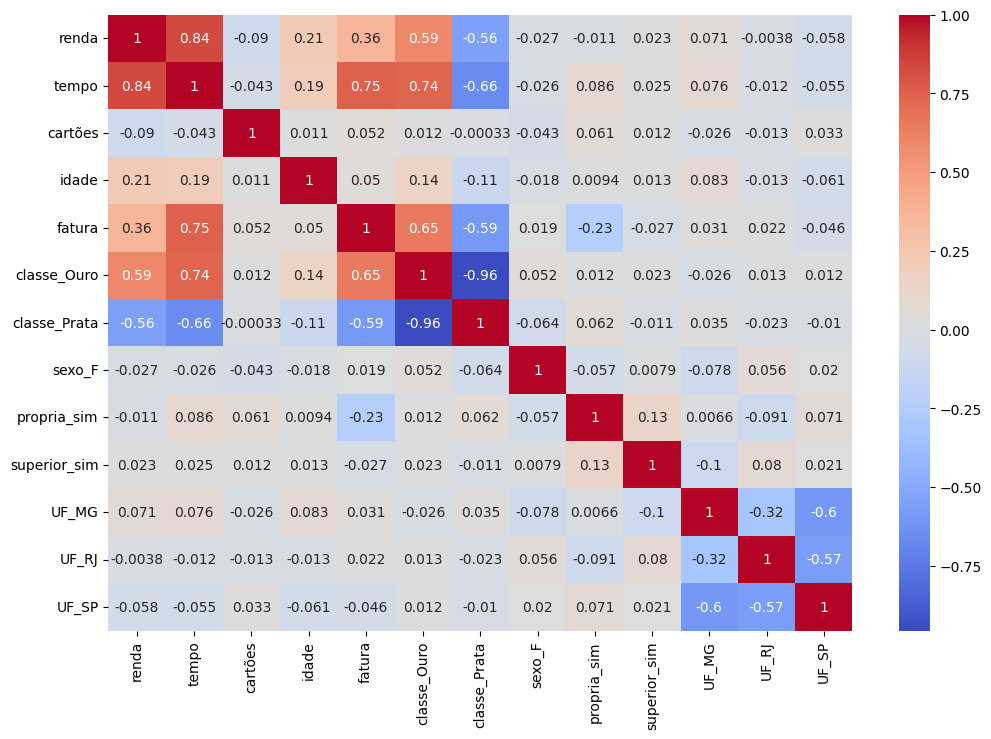

In [112]:
# Criando a matriz de correlação
corr = df.corr()

# Criando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

Valor da fatura possui alta correlação positiva com as variáveis renda, tempo e classe_Ouro. E negativas com: classe_Prata e superior_Sim

In [113]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

df['classe_Ouro'] = df['classe_Ouro'].astype(int)
df['classe_Prata'] = df['classe_Prata'].astype(int)
df['superior_sim'] = df['superior_sim'].astype(int)

X = df[['renda', 'tempo', 'classe_Ouro', 'classe_Prata', 'superior_sim']]
y = df['fatura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# treinando o modelo usando statsmodels
X_train = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train).fit()

# visualizando o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 fatura   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.46e-78
Time:                        14:48:14   Log-Likelihood:                -1047.1
No. Observations:                 214   AIC:                             2106.
Df Residuals:                     208   BIC:                             2126.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          220.6690     16.779     13.151   

# Interpretação dos Resultados da Regressão OLS

## Qualidade do Modelo
- **R-quadrado: 0,830** - O modelo explica 83% da variância em 'fatura', indicando um bom ajuste
- **R-quadrado ajustado: 0,826** - Permanece alto mesmo após considerar o número de preditores
- **Estatística F: 203,7 (valor-p ≈ 0)** - O modelo como um todo é altamente estatisticamente significativo

## Efeitos das Variáveis
- **const (220,67)**: O valor base quando todas as outras variáveis são zero
- **renda (-0,0152)**: Para cada unidade de aumento na renda, o valor da fatura diminui em 0,0152 unidades (altamente significativo, p < 0,001)
- **tempo (39,17)**: Cada unidade de aumento no tempo está associada a um aumento de 39,17 unidades na fatura (altamente significativo, p < 0,001)
- **classe_Ouro (-45,97)**: Clientes da classe Ouro têm faturas cerca de 46 unidades mais baixas em comparação com a classe de referência (significativo, p = 0,018)
- **classe_Prata (-70,48)**: Clientes da classe Prata têm faturas cerca de 70 unidades mais baixas em comparação com a classe de referência (altamente significativo, p < 0,001)
- **superior_sim (-6,10)**: Ter ensino superior está associado a uma pequena diminuição no valor da fatura, mas esse efeito não é estatisticamente significativo (p = 0,186)

## Preocupações
1. **Alerta de multicolinearidade**: O número de condição é muito grande (1,05e+05), sugerindo possíveis correlações fortes entre as variáveis preditoras
2. **Resíduos não normais**: Os testes Omnibus e Jarque-Bera indicam que os resíduos não estão normalmente distribuídos (assimetria positiva)

O modelo sugere que o tempo tem o impacto positivo mais forte sobre o valor da fatura, enquanto a renda e a classe do cliente (Ouro/Prata) têm associações significativas negativas com a faturação.

In [115]:
# testando modelo sem a variável 'superior_sim'
X_train.drop(['superior_sim'], axis=1, inplace=True)
modelo = sm.OLS(y_train, X_train).fit()

# visualizando o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 fatura   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     253.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           6.29e-79
Time:                        14:48:14   Log-Likelihood:                -1048.0
No. Observations:                 214   AIC:                             2106.
Df Residuals:                     209   BIC:                             2123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          217.7616     16.665     13.067   

# Interpretação dos Resultados da Regressão OLS (Versão Atualizada)

## Qualidade do Modelo
- **R-quadrado: 0,829** - O modelo explica 82,9% da variância na fatura, indicando um ajuste muito bom
- **R-quadrado ajustado: 0,826** - Permanece alto mesmo após ajustes para o número de variáveis
- **Estatística F: 253,3 (valor-p ≈ 0)** - O modelo como um todo é altamente significativo estatisticamente

## Observações
1. **Multicolinearidade**: O número de condição continua alto (1,04e+05), sugerindo possíveis correlações entre variáveis preditoras
2. **Distribuição dos resíduos**: Os testes Omnibus e Jarque-Bera indicam que os resíduos não seguem uma distribuição normal (assimetria positiva de 1,212)
3. **Comparação com modelo anterior**: Nota-se que a remoção da variável "superior_sim" (não significativa) resultou em um modelo mais simples com praticamente o mesmo poder explicativo (R-quadrado e R-quadrado ajustado quase idênticos)

Este modelo mostra que o tempo é o principal fator positivo no valor da fatura, enquanto a renda e as classes de clientes (Ouro e Prata) têm efeitos negativos significativos na fatura.

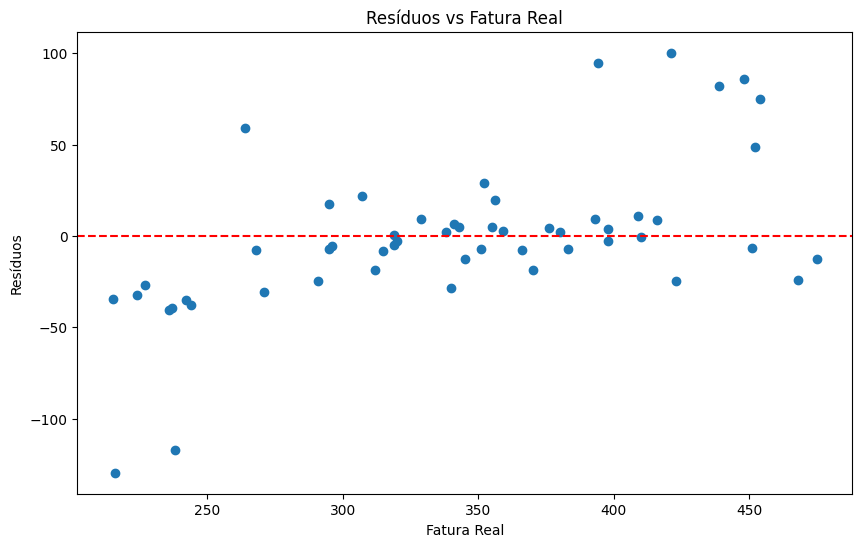

In [116]:
# testando com X_test
X_test = sm.add_constant(X_test)
X_test.drop(['superior_sim'], axis=1, inplace=True)

y_pred = modelo.predict(X_test)

# visualizando a diferença entre os valores reais e os valores previstos
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fatura Real')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Fatura Real')

plt.show()